In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# read the CSV file
test_knight = pd.read_csv('/myvolume/subject/data/Test_knight.csv')
train_knight = pd.read_csv('/myvolume/subject/data/Train_knight.csv')

# plot scatter plot
def plot_scatter(df, col_1, col_2, cmap=None):
    plt.scatter(df[col_1], df[col_2], alpha=0.5, c=cmap)
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.title(f'Scatter plot of {col_1} vs {col_2}')
    plt.legend()
    plt.show()

/tmp/ipykernel_6899/2234014279.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


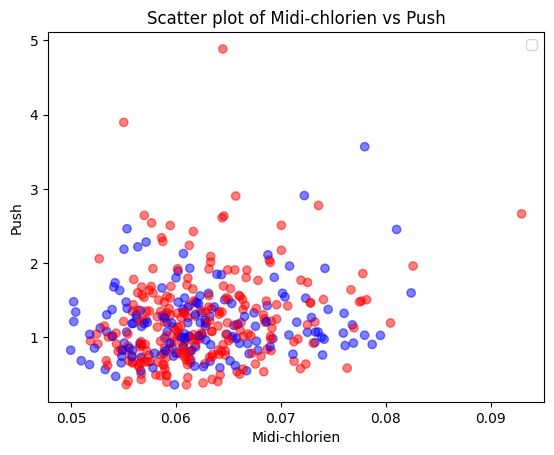

In [15]:
cmap = train_knight['knight'].map({'Jedi': 'blue', 'Sith': 'red'})
plot_scatter(train_knight, 'Midi-chlorien', 'Push', cmap=cmap)

In [21]:
# make normalization data
# drop the 'knight' column
train_knight_norm = train_knight.copy().drop(columns=['knight'])
# normalize the data
train_knight_norm = (train_knight_norm - train_knight_norm.min()) / (train_knight_norm.max() - train_knight_norm.min())
# add the 'knight' column back
train_knight_norm['knight'] = train_knight['knight']
print(train_knight.head(1))
print(train_knight_norm.head(1))

   Sensitivity  Hability  Strength  Power  Agility  Dexterity  Awareness  \
0         11.8     17.26     75.26  431.9  0.09087    0.06232    0.02853   

   Prescience  Reactivity  Midi-chlorien  ...  Evade  Stims  Sprint   Combo  \
0     0.01638      0.1847        0.06019  ...  24.49   86.0   562.0  0.1244   

    Delay  Attunement  Empowered   Burst  Grasping  knight  
0  0.1726      0.1449    0.05356  0.2779   0.08121    Sith  

[1 rows x 31 columns]
   Sensitivity  Hability  Strength     Power   Agility  Dexterity  Awareness  \
0     0.228075  0.255326  0.217469  0.122333  0.339141   0.135019   0.066909   

   Prescience  Reactivity  Midi-chlorien  ...     Evade    Stims    Sprint  \
0    0.089852    0.397475       0.237907  ...  0.379604  0.17725  0.092607   

      Combo    Delay  Attunement  Empowered     Burst  Grasping  knight  
0  0.351516  0.14098    0.115735   0.184055  0.365993  0.171652    Sith  

[1 rows x 31 columns]


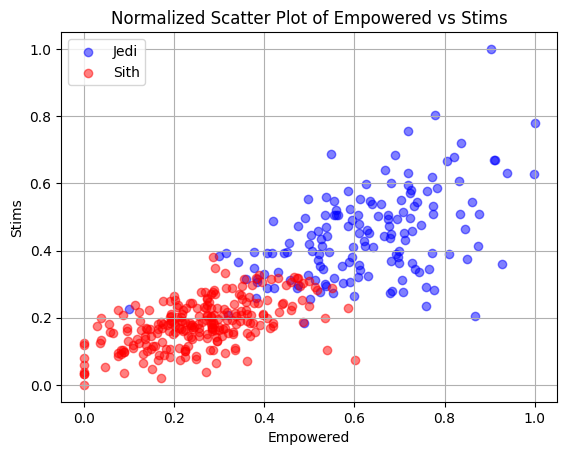

In [ ]:
# this code can plot legend data
colors = {'Jedi': 'blue', 'Sith': 'red'}
for label in colors:
    subset = train_knight_norm[train_knight_norm['knight'] == label]
    plt.scatter(
        subset['Midi-chlorien'],
        subset['Push'],
        alpha=0.5,
        c=colors[label],
        label=label
    )
plt.xlabel('Midi-chlorien')
plt.ylabel('Push')
plt.title('Normalized Scatter Plot of Midi-chlorien vs Push')
# plt.legend(title='Knight')
plt.legend()
plt.grid(True)
plt.show()